## Homework 2

### Q0: Download the data set

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time

In [122]:
# Download the data set and read it
df_trainx = pd.read_csv(
    '/Users/luluxu/Desktop/Math6373/HW/Homework_2/HW2_DATA/X_train.txt',header=None,delim_whitespace=True)
df_trainy = pd.read_csv(
    '/Users/luluxu/Desktop/Math6373/HW/Homework_2/HW2_DATA/y_train.txt',header=None)
df_testx = pd.read_csv(
    '/Users/luluxu/Desktop/Math6373/HW/Homework_2/HW2_DATA/X_test.txt',header=None,delim_whitespace=True)
df_testy = pd.read_csv(
    '/Users/luluxu/Desktop/Math6373/HW/Homework_2/HW2_DATA/y_test.txt',header=None)

In [123]:
# We want to resplit the training set and test set, so we combine the dataset first.
df_train = pd.concat([df_trainx, df_trainy], axis=1)
df_test = pd.concat([df_testx, df_testy], axis=1)
df = pd.concat([df_train, df_test], axis=0)
df.shape
# In this dataset we have 10299 cases and 561 features, and 1 label column.

(10299, 562)

In [124]:
# check the missing data
total_missing = df.isnull().sum().sum()
total_missing

0

In [125]:
num_groups = df.iloc[:, -1].nunique()
num_groups # we have 6 classes in this dataset

6

### Q1: Pre-treatment

In [126]:
# Check categorical features
cat_cols = df.select_dtypes(include=['object'])
cat_cols_indices = cat_cols.columns
cat_cols_indices # We don't have any categorical features

Int64Index([], dtype='int64')

In [127]:
# Check the size of each class
class1 = df[df.iloc[:,-1]==1]
class2 = df[df.iloc[:,-1]==2]
class3 = df[df.iloc[:,-1]==3]
class4 = df[df.iloc[:,-1]==4]
class5 = df[df.iloc[:,-1]==5]
class6 = df[df.iloc[:,-1]==6]
class1.shape,class2.shape,class3.shape,class4.shape,class5.shape,class6.shape
# The 6 classes are rouphly balance

((1722, 562), (1544, 562), (1406, 562), (1777, 562), (1906, 562), (1944, 562))

In [128]:
# Sliptting the data set to training set and test set
from sklearn.model_selection import train_test_split

X1 = class1.iloc[:,:561] # Features
y1 = class1.iloc[:,-1] # Target variable

# Split the dataset into training and test sets with stratified sampling
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, stratify=y1)
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((1377, 561), (345, 561), (1377,), (345,))

In [129]:
X2= class2.iloc[:,:561] # Features
y2 = class2.iloc[:,-1] # Target variable

# Split the dataset into training and test sets with stratified sampling
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, stratify=y2)
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((1235, 561), (309, 561), (1235,), (309,))

In [130]:
X3 = class3.iloc[:,:561] # Features
y3 = class3.iloc[:,-1] # Target variable

# Split the dataset into training and test sets with stratified sampling
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, stratify=y3)
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((1124, 561), (282, 561), (1124,), (282,))

In [131]:
X4 = class4.iloc[:,:561] # Features
y4 = class4.iloc[:,-1] # Target variable

# Split the dataset into training and test sets with stratified sampling
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, stratify=y4)
X_train4.shape, X_test4.shape, y_train4.shape, y_test4.shape

((1421, 561), (356, 561), (1421,), (356,))

In [132]:
X5 = class5.iloc[:,:561] # Features
y5 = class5.iloc[:,-1] # Target variable

# Split the dataset into training and test sets with stratified sampling
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, stratify=y5)
X_train5.shape, X_test5.shape, y_train5.shape, y_test5.shape

((1524, 561), (382, 561), (1524,), (382,))

In [133]:
X6 = class6.iloc[:,:561] # Features
y6 = class6.iloc[:,-1] # Target variable

# Split the dataset into training and test sets with stratified sampling
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2, stratify=y6)
X_train6.shape, X_test6.shape, y_train6.shape, y_test6.shape

((1555, 561), (389, 561), (1555,), (389,))

In [134]:
# Creat training set"TRAIN" and test set "TEST"
X_TRAIN = pd.concat([X_train1, X_train2, X_train3, X_train4, X_train5, X_train6], axis=0)
X_TEST = pd.concat([X_test1, X_test2, X_test3, X_test4, X_test5, X_test6], axis=0)
y_TRAIN = pd.concat([y_train1, y_train2, y_train3, y_train4, y_train5, y_train6], axis=0)
y_TEST = pd.concat([y_test1, y_test2, y_test3, y_test4, y_test5, y_test6], axis=0)
X_TRAIN.shape, X_TEST.shape, y_TRAIN.shape, y_TEST.shape

((8236, 561), (2063, 561), (8236,), (2063,))

### Q2: Implement MLP classifier having one single hidden layer

In [135]:
# Classes: CL1, CL2, CL3, CL4, CL5, CL6
# MLP architecture: L1->H->L3->softmax
# Input(Xn)->hidden layer(H)->output(OUTn)->softmax->Pn
# Pn = softmax(OUTn) = [Pn(1), …, Pn(k)]
# dim(Xn) = p = # features = 561 ; dim(OUTn) = k= # classes = 6;
# dim(hidden layer H) = h; h is unknown

In [136]:
# - Explain the meaning of Pn(j)
#   Softmax is a function that takes as input a vector of numbers, in this case OUTn, 
#   and outputs a vector of probabilities, Pn, where each element of Pn represents 
#   the probability that the nth observation belongs to a particular class.
#   Pn(j) represents the probability that the nth observation belongs to the jth class, 
#   as determined by the softmax function applied to the vector of scores or activations 
#   for that observation.

In [137]:
# - Explain how the MLP makes its final decision about the predicted class 
#   The automatic classification MLP uses the softmax function to produce a vector of class 
#   probabilities based on the outputs of its output layer neurons. It then selects the class 
#   with the highest probability as the final predicted class.

In [138]:
# - Explain the softmax formula
#   The softmax function takes an input vector x of size k and produces an output vector 
#   of the same size, where each element of the output vector is a probability value 
#   between 0 and 1, and the sum of all elements in the output vector equals 1.

In [139]:
# - Explain how the cross-entropy loss CRE(n) is calculated for each case #n
#   Cross-entropy loss (CRE) is a commonly used loss function in machine learning, 
#   particularly for classification problems. It measures the difference between the 
#   predicted probability distribution and the true probability distribution of the 
#   target variable. 
#   If the predicted probability p_n is close to 1, the loss contribution will be small, 
#   and vice versa.  If the predicted probability p_n is close to 0, the loss contribution
#   will be small.

In [140]:
# Define the average CrossEntropy on training set and  test set (of sizes Ntrain and Ntest) 
# train.avCRE = [CRE(1) + … +  CRE(Ntrain)] / Ntrain
# test.avCRE = [CRE(1) + … +  CRE(Ntest)] / Ntest
Ntrain = X_TRAIN.shape[0]
Ntest = X_TEST.shape[0]
Ntrain, Ntest

(8236, 2063)

In [141]:
y_TRAIN_int=y_TRAIN.astype(int)
y_TRAIN = np.eye(6)[y_TRAIN_int-1]
y_TRAIN.shape # one-hot encoding of y_TRAIN

(8236, 6)

In [142]:
y_TEST_int=y_TEST.astype(int)
y_TEST = np.eye(6)[y_TEST_int-1]
y_TEST.shape # one-hot encoding of y_TEST

(2063, 6)

In [24]:
# Change type
X_TRAIN = np.array(X_TRAIN)
X_TEST = np.array(X_TEST)
y_TRAIN = np.array(y_TRAIN)
y_TEST = np.array(y_TEST)

In [25]:
# Select the following training options
# optimizer = ADAMS, 
# response function = RELU , 
# batch size = Ntrain/100 , 
# Ntrain= training set size,
# the number of epochs = 150, 
# initial weights= random, 
# loss function = cross entropy
# dim(H)= h = p/2 where p = # features, h = 561/2 = 280

In [231]:
# Launch the automatic learning
# Define the MLP architecture

train_avCRE150=list()
test_avCRE150=list()
test_accuracy150=list()
train_accuracy150=list()

model150 = tf.keras.Sequential() #build model
model150.add(keras.Input(shape=(561,)))
model150.add(layers.Dense(280, activation="relu"))
model150.add(layers.Dense(6,activation="softmax"))
  
# Define the training options
optimizer = tf.keras.optimizers.Adam()
batch_size = Ntrain // 100
num_epochs = 150
    
model150.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
loss_fn = tf.keras.losses.CategoricalCrossentropy()

train_dataset = tf.data.Dataset.from_tensor_slices((X_TRAIN, y_TRAIN)) # for batch train , create dataset
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_TEST, y_TEST)).batch(batch_size)


for epoch in range(num_epochs):
    start = time.time()
    with tf.GradientTape() as tape:
        for step, (Xbatch_train, Ybatch_train) in enumerate(train_dataset): 
            with tf.GradientTape() as tape:

                prediction_train_batch = model150(Xbatch_train,training=True)
                prediction_train.append(prediction_train_batch)
                loss_train = loss_fn(Ybatch_train, prediction_train_batch)
                
                grads = tape.gradient(loss_train, model150.trainable_weights)
                model150.optimizer.apply_gradients(zip(grads, model150.trainable_weights)) 
        
    train_loss150, train_acc150 = model150.evaluate(X_TRAIN, y_TRAIN, verbose=0)
    test_loss150, test_acc150 = model150.evaluate(X_TEST, y_TEST, verbose=0)
    train_avCRE150.append(train_loss150)
    test_avCRE150.append(test_loss150)
    train_accuracy150.append(train_acc150)
    test_accuracy150.append(test_acc150)
    
    end=time.time()
    cpu150=end-start


Text(0.5, 1.0, 'avCRE of MLP')

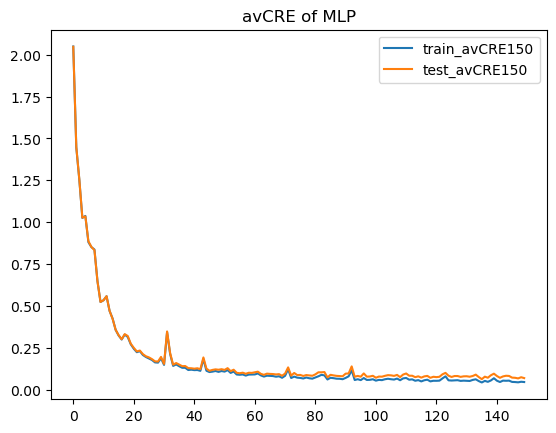

In [242]:
# Display train.avCRE(m) and test.avCRE(m) versus epoch(m)curves on same graph
plt.plot(range(150),train_avCRE150)
plt.plot(range(150),test_avCRE150)
plt.legend(['train_avCRE150','test_avCRE150'])
plt.title('avCRE of MLP')
# epochs = 150 was sufficient

Text(0.5, 1.0, 'Accuracy of MLP')

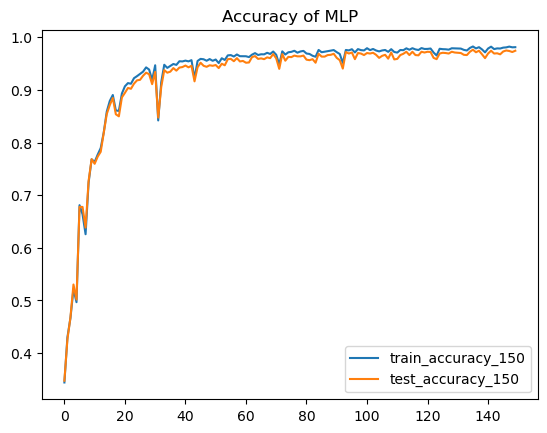

In [241]:
plt.plot(range(150),train_accuracy150)
plt.plot(range(150),test_accuracy150)
plt.legend(['train_accuracy_150','test_accuracy_150'])
plt.title('Accuracy of MLP')

In [244]:
m_CRE_150=np.argmin(test_avCRE150)
m_CRE_150

135

In [248]:
m_CRE_train150=np.argmin(train_avCRE150)
m_CRE_train150

135

In [252]:
m_acc_train1=np.argmax(train_accuracy150)
m_acc_test1=np.argmax(test_accuracy150)
m_acc_train1,m_acc_test1

(135, 135)

In [38]:
# access paramaters of a layer by get_weights()
hidden1=model150.layers[0]
weights,biase=hidden1.get_weights()
weights.shape,biase.shape

((561, 280), (280,))

In [283]:
# Select m* = 150 to be the best stopping Epoch. 
# Compute the actual class predictions of MLP* on all the test cases 
# and the test-accuracy of MLP* 
test_avCRE_star = np.round((test_avCRE150[-1])*100,2)
test_acc_star = np.round((test_accuracy150[-1])*100,2)
test_avCRE_star, test_acc_star
print('The percentage of correct classifications obtained by MLP* on the test set is',
      test_acc_star,'%')

The percentage of correct classifications obtained by MLP* on the test set is 97.43 %


In [278]:
# Compute the k x k(6*6) confusion matrix testCONF* of MLP* on the test set 
y_predict_150 = np.argmax(model150.predict(X_TEST),axis=1)
y_pred_150 = y_predict_150+1

from sklearn.metrics import confusion_matrix
testCONF_star = confusion_matrix(y_TEST_int, y_pred_150)

R1 = np.round(testCONF_star[0,:] / np.sum(testCONF_star[0,:]), 4) * 100
R2 = np.round(testCONF_star[1,:] / np.sum(testCONF_star[1,:]), 4) * 100
R3 = np.round(testCONF_star[2,:] / np.sum(testCONF_star[2,:]), 4) * 100
R4 = np.round(testCONF_star[3,:] / np.sum(testCONF_star[3,:]), 4) * 100
R5 = np.round(testCONF_star[4,:] / np.sum(testCONF_star[4,:]), 4) * 100
R6 = np.round(testCONF_star[5,:] / np.sum(testCONF_star[5,:]), 4) * 100
conf_matrix_test_star = np.vstack((R1, R2, R3, R4, R5, R6))
print(conf_matrix_test_star)

65/65 [==============================] - 0s 649us/step
[[ 99.71   0.     0.29   0.     0.     0.  ]
 [  0.   100.     0.     0.     0.     0.  ]
 [  0.     0.   100.     0.     0.     0.  ]
 [  0.     0.     0.    88.48  11.52   0.  ]
 [  0.26   0.     0.     2.62  97.12   0.  ]
 [  0.     0.     0.     0.     0.   100.  ]]


In [282]:
# Give the computing time per epoch during automatic learning 
np.round(cpu150,4)

1.0256

### Q3 : Try “low value” hlow for h = dimH

/var/folders/qf/45vdh7_x3tn8ms40l6dgzrbh0000gn/T/ipykernel_2444/2296349139.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  s = np.sum(lm).astype(int)


Text(0, 0.5, 'PEV')

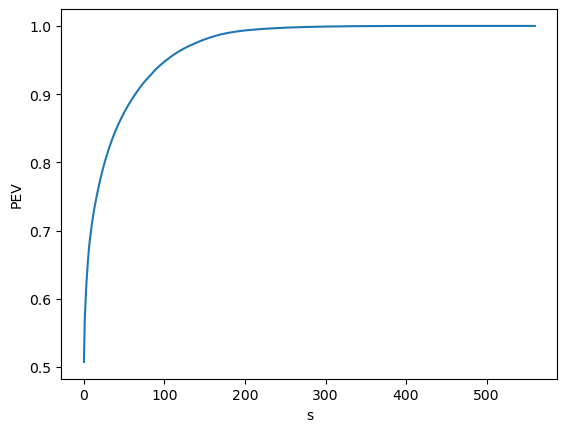

In [321]:
# Xn=input vectors, dim(Xn) = p = 561
# The dataset already Centering & Rescaling 
# - perform a PCA analysis of these N vectors Xn
Xn = np.vstack((X_TRAIN, X_TEST))
XX = np.corrcoef(Xn.T)
eigenvalues = np.linalg.eig(XX)
lm = eigenvalues[0]
s = np.sum(lm).astype(int)
# Display PEV(r) = percentage of explained variance versus #s of principal components
PEV = np.cumsum(lm / s)
plt.plot(range(s),PEV)
plt.xlabel('s')
plt.ylabel('PEV')

In [324]:
# Implement PCA analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9) 
# Compute the smallest number h_low of principal components to explain 90% of the variance of Xn
X=pca.fit_transform(Xn) # Compute and denote U(t)
X.shape # Data X is 10299 dimention and 36 features h_low=36

(10299, 36)

In [271]:
# Launch automatic learning for h= h_low=36  using the same options as in Q2 
# Try epochs = 150
# Define the MLP architecture

train_avCRE_low=list()
test_avCRE_low=list()
train_accuracy_low=list()
test_accuracy_low=list()

model_low = tf.keras.Sequential() #build model
model_low.add(keras.Input(shape=(561,)))
model_low.add(layers.Dense(36, activation="relu"))
model_low.add(layers.Dense(6,activation="softmax"))
  
# Define the training options
optimizer = tf.keras.optimizers.Adam()
batch_size = Ntrain // 100
num_epochs = 150
    
model_low.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
loss_fn = tf.keras.losses.CategoricalCrossentropy()

train_dataset = tf.data.Dataset.from_tensor_slices((X_TRAIN, y_TRAIN)) # for batch train , create dataset
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_TEST, y_TEST)).batch(batch_size)


for epoch in range(num_epochs):
    start = time.time()
    with tf.GradientTape() as tape:
        for step, (Xbatch_train, Ybatch_train) in enumerate(train_dataset): 
            with tf.GradientTape() as tape:

                prediction_train_batch = model_low(Xbatch_train,training=True)
                prediction_train.append(prediction_train_batch)
                loss_train = loss_fn(Ybatch_train, prediction_train_batch)
                
                grads = tape.gradient(loss_train, model_low.trainable_weights)
                model_low.optimizer.apply_gradients(zip(grads, model_low.trainable_weights)) 
        
    train_loss_low, train_acc_low = model_low.evaluate(X_TRAIN, y_TRAIN, verbose=0)
    test_loss_low, test_acc_low = model_low.evaluate(X_TEST, y_TEST, verbose=0)
    train_avCRE_low.append(train_loss_low)
    test_avCRE_low.append(test_loss_low)
    train_accuracy_low.append(train_acc_low)
    test_accuracy_low.append(test_acc_low)
    
    end=time.time()
    cpu_low=end-start



Text(0.5, 1.0, 'avCRE of MLP')

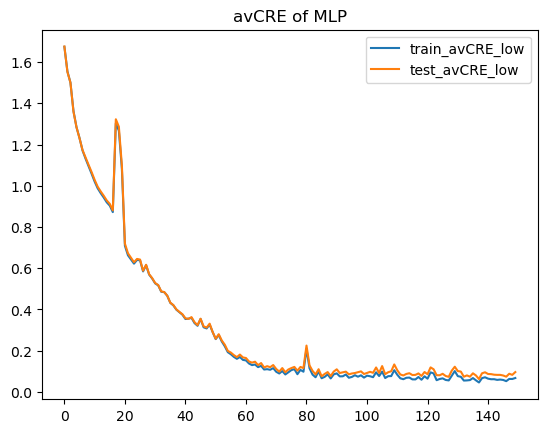

In [239]:
# Display train.avCRE(m) and test.avCRE(m) versus epoch(m)curves on same graph
plt.plot(range(150),train_avCRE_low)
plt.plot(range(150),test_avCRE_low)
plt.legend(['train_avCRE_low','test_avCRE_low'])
plt.title('avCRE of MLP')

Text(0.5, 1.0, 'Accuracy of MLP')

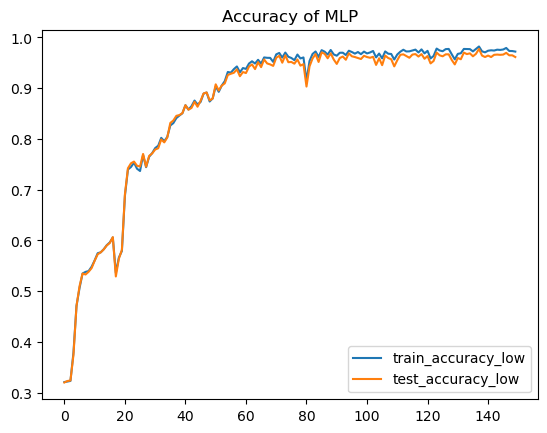

In [240]:
plt.plot(range(150),train_accuracy_low)
plt.plot(range(150),test_accuracy_low)
plt.legend(['train_accuracy_low','test_accuracy_low'])
plt.title('Accuracy of MLP')

In [245]:
m_CRE_low=np.argmin(test_avCRE_low)
m_CRE_low

137

In [249]:
m_CRE_trainlow=np.argmin(train_avCRE_low)
m_CRE_trainlow

137

In [268]:
m_acc_train2=np.argmax(train_accuracy_low)
m_acc_test2=np.argmax(test_accuracy_low)
m_acc_train2,m_acc_test2

(137, 137)

In [269]:
# access paramaters of a layer by get_weights()
hidden1=model_low.layers[0]
weights,biase=hidden1.get_weights()
weights.shape,biase.shape

((561, 36), (36,))

In [272]:
# Compute the actual class predictions of MLP_low on all the test cases 
# and the test-accuracy of MLP_low
test_avCRE_low = np.round((test_avCRE_low[-1])*100,2)
test_acc_low = np.round((test_accuracy_low[-1])*100,2)
test_acc_low
print('The percentage of correct classifications obtained by MLP_low on the test set is',
      test_acc_low,'%')

The percentage of correct classifications obtained by MLP_low on the test set is 96.85 %


In [273]:
# Compute the k x k(6*6) confusion matrix testCONF_low of MLP_low on the test set 
y_predict_low = np.argmax(model_low.predict(X_TEST),axis=1)
y_pred_low = y_predict_low+1

from sklearn.metrics import confusion_matrix
testCONF_low = confusion_matrix(y_TEST_int, y_pred_low)

R1 = np.round(testCONF_low[0,:] / np.sum(testCONF_low[0,:]), 4) * 100
R2 = np.round(testCONF_low[1,:] / np.sum(testCONF_low[1,:]), 4) * 100
R3 = np.round(testCONF_low[2,:] / np.sum(testCONF_low[2,:]), 4) * 100
R4 = np.round(testCONF_low[3,:] / np.sum(testCONF_low[3,:]), 4) * 100
R5 = np.round(testCONF_low[4,:] / np.sum(testCONF_low[4,:]), 4) * 100
R6 = np.round(testCONF_low[5,:] / np.sum(testCONF_low[5,:]), 4) * 100
conf_matrix_test = np.vstack((R1, R2, R3, R4, R5, R6))
print(conf_matrix_test)

65/65 [==============================] - 0s 570us/step
[[ 97.97   1.74   0.29   0.     0.     0.  ]
 [  0.   100.     0.     0.     0.     0.  ]
 [  0.     0.   100.     0.     0.     0.  ]
 [  0.     0.     0.    85.96  14.04   0.  ]
 [  0.     0.     0.     2.09  97.91   0.  ]
 [  0.     0.     0.     0.     0.   100.  ]]


In [281]:
# Give the computing time per epoch during automatic learning 
np.round(cpu_low,4)

0.8835

### Q4 :  evaluate h_high for h= dim(hidden layer)

In [58]:
# Separately for each class CLj, of size Nj: 
CL1 = class1.iloc[:,:561]
CL2 = class2.iloc[:,:561]
CL3 = class3.iloc[:,:561]
CL4 = class4.iloc[:,:561]
CL5 = class5.iloc[:,:561]
CL6 = class6.iloc[:,:561]
N1 = CL1.shape[0]
N2 = CL2.shape[0]
N3 = CL3.shape[0]
N4 = CL4.shape[0]
N5 = CL5.shape[0]
N6 = CL6.shape[0]
N1, N2, N3, N4, N5, N6

(1722, 1544, 1406, 1777, 1906, 1944)

In [61]:
# Launch  PCA analysis for all the Nj input vectors Xn corresponding to the cases 
  #n belonging to class CLj
# CLj=input vectors, dim(CLj) = p = 561

# Define class_pca 
def class_pac(x,classnumber):
    pca=PCA(n_components=0.9)
    pca.fit_transform(x)
    cumsum=np.cumsum(pca.explained_variance_ratio_)
    h_low=np.argmax(cumsum>=0.90)+1
    plt.plot(cumsum)
    plt.xlabel('principal components')
    plt.title('CL{0} 90% explained variance'.format(classnumber))
    plt.show()
    return h_low

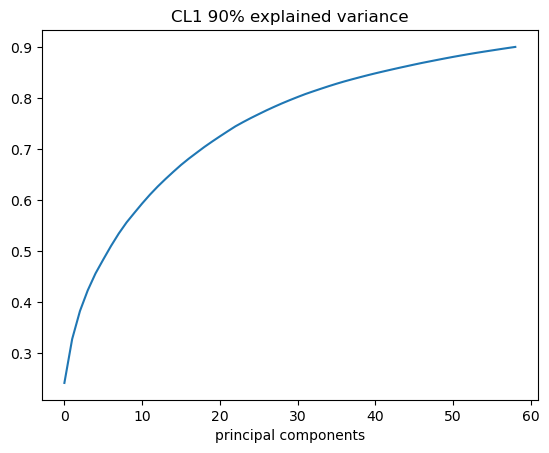

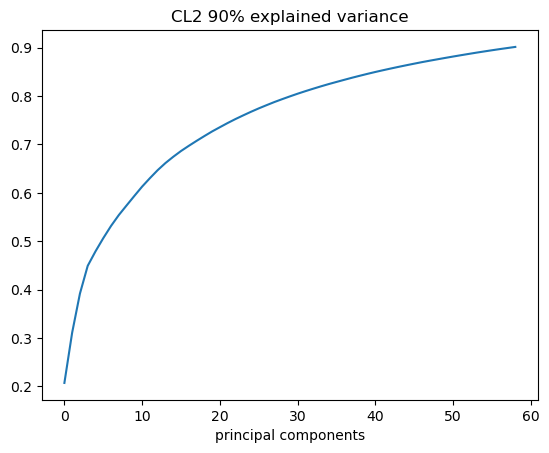

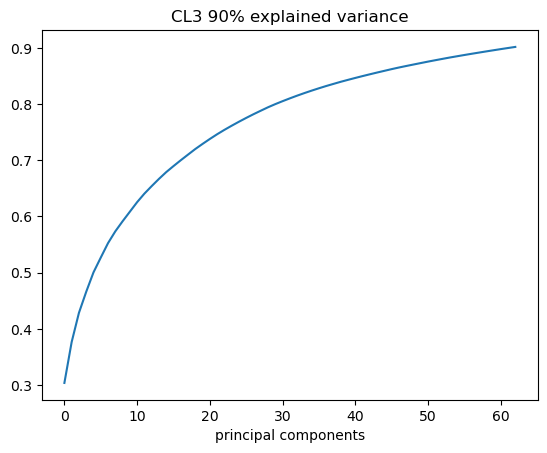

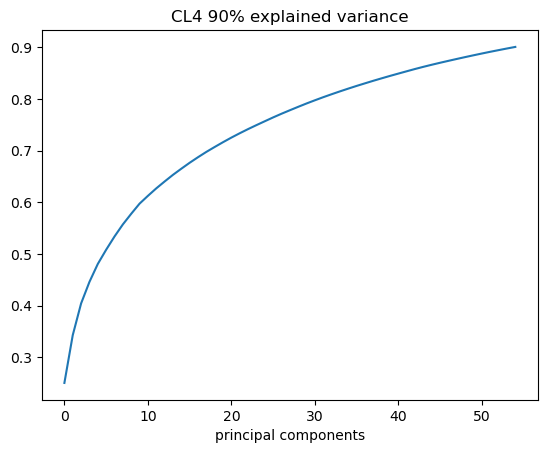

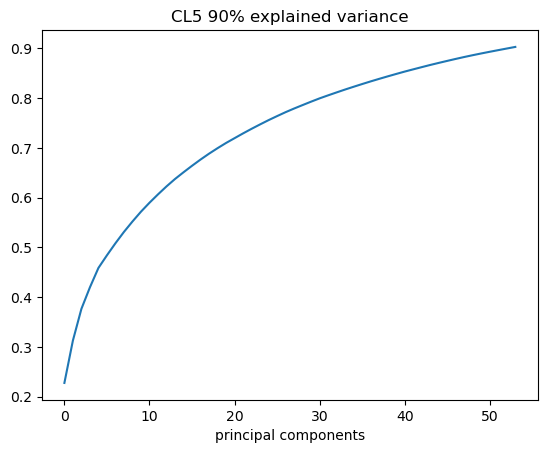

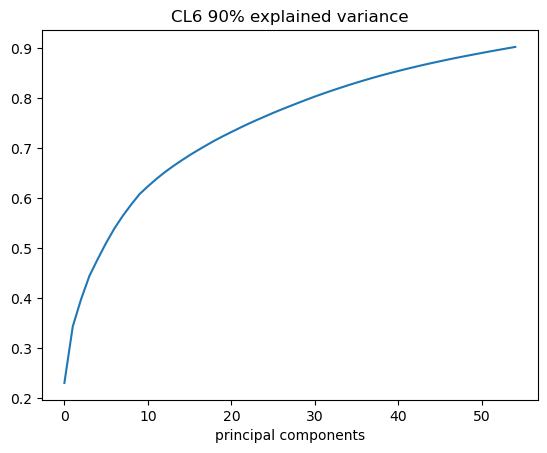

(59, 59, 63, 55, 54, 55)

In [63]:
class_pac(CL1,1),class_pac(CL2,2),class_pac(CL3,3),class_pac(CL4,4),class_pac(CL5,5),class_pac(CL6,6)

In [64]:
# Define h_high = h1 + h2 + … + hk
h_high = np.sum([59, 59, 63, 55, 54, 55])
h_high

345

In [275]:
# Implement automatic learning as above for this new value h = h_high
# Try epochs = 150
prediction_train=list()
prediction_test=list()
train_avCRE_high=list()
test_avCRE_high=list()
train_accuracy_high=list()
test_accuracy_high=list()

model_high= tf.keras.Sequential() #build model
model_high.add(keras.Input(shape=(561,)))
model_high.add(layers.Dense(345, activation="relu"))
model_high.add(layers.Dense(6,activation="softmax"))
  
# Define the training options
optimizer = tf.keras.optimizers.Adam()
batch_size = Ntrain // 100
num_epochs = 150
    
model_high.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
loss_fn = tf.keras.losses.CategoricalCrossentropy()

train_dataset = tf.data.Dataset.from_tensor_slices((X_TRAIN, y_TRAIN)) # for batch train , create dataset
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_TEST, y_TEST)).batch(batch_size)

for epoch in range(num_epochs):
    start = time.time()
    for step, (Xbatch_train, Ybatch_train) in enumerate(train_dataset): 
        with tf.GradientTape() as tape:

            prediction_train_batch = model_high(Xbatch_train,training=True)
            prediction_train.append(prediction_train_batch)
            loss_train = loss_fn(Ybatch_train, prediction_train_batch)
            grads = tape.gradient(loss_train, model_high.trainable_weights)
            model_high.optimizer.apply_gradients(zip(grads, model_high.trainable_weights)) 
        
    train_loss_high, train_acc_high = model_high.evaluate(X_TRAIN, y_TRAIN, verbose=0)
    test_loss_high, test_acc_high = model_high.evaluate(X_TEST, y_TEST, verbose=0)
    train_avCRE_high.append(train_loss_high)
    test_avCRE_high.append(test_loss_high)
    train_accuracy_high.append(train_acc_high)
    test_accuracy_high.append(test_acc_high)
    
    end=time.time()
    cpu_high=end-start


Text(0.5, 1.0, 'avCRE of MLP')

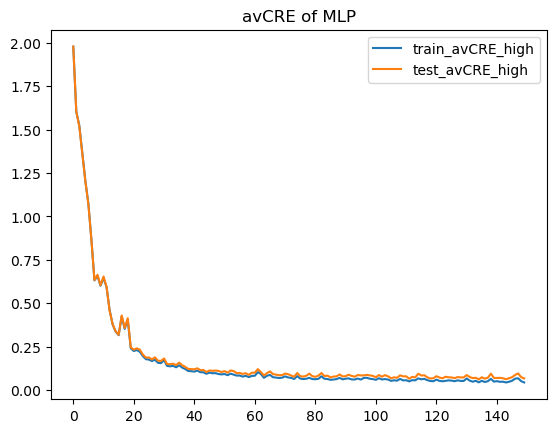

In [237]:
# Display train.avCRE(m) and test.avCRE(m) versus epoch(m)curves on same graph
plt.plot(range(150),train_avCRE_high)
plt.plot(range(150),test_avCRE_high)
plt.legend(['train_avCRE_high','test_avCRE_high'])
plt.title('avCRE of MLP')

Text(0.5, 1.0, 'Accuracy of MLP')

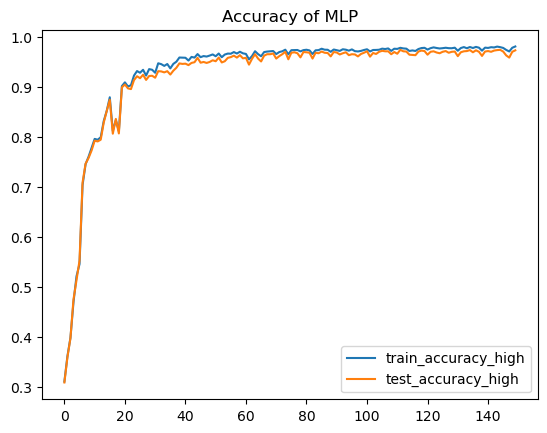

In [238]:
plt.plot(range(150),train_accuracy_high)
plt.plot(range(150),test_accuracy_high)
plt.legend(['train_accuracy_high','test_accuracy_high'])
plt.title('Accuracy of MLP')

In [246]:
m_CRE_high=np.argmin(test_avCRE_high)
m_CRE_high

134

In [250]:
m_CRE_trainhigh=np.argmin(train_avCRE_high)
m_CRE_trainhigh

143

In [254]:
m_acc_train3=np.argmax(train_accuracy_high)
m_acc_test3=np.argmax(test_accuracy_high)
m_acc_train3,m_acc_test3

(149, 111)

In [276]:
# best mlp high m value seems at m=150
# Compute the actual class predictions of MLP_high on all the test cases 
# and the test-accuracy of MLP_high
test_avCRE_high = np.round((test_avCRE_high[-1])*100,2)
test_acc_high = np.round((test_accuracy_high[-1])*100,2)
test_acc_high
print('The percentage of correct classifications obtained by MLP_high on the test set is',
      test_acc_high,'%')

The percentage of correct classifications obtained by MLP_high on the test set is 97.38 %


In [284]:
# Compute the k x k(6*6) confusion matrix testCONF_high of MLP_high on the test set 
y_predict_high = np.argmax(model_high.predict(X_TEST),axis=1)
y_pred_high = y_predict_high+1

from sklearn.metrics import confusion_matrix
testCONF_high = confusion_matrix(y_TEST_int, y_pred_high)

R1 = np.round(testCONF_high[0,:] / np.sum(testCONF_high[0,:]), 4) * 100
R2 = np.round(testCONF_high[1,:] / np.sum(testCONF_high[1,:]), 4) * 100
R3 = np.round(testCONF_high[2,:] / np.sum(testCONF_high[2,:]), 4) * 100
R4 = np.round(testCONF_high[3,:] / np.sum(testCONF_high[3,:]), 4) * 100
R5 = np.round(testCONF_high[4,:] / np.sum(testCONF_high[4,:]), 4) * 100
R6 = np.round(testCONF_high[5,:] / np.sum(testCONF_high[5,:]), 4) * 100
conf_matrix_test_high = np.vstack((R1, R2, R3, R4, R5, R6))
print(conf_matrix_test_high)

65/65 [==============================] - 0s 717us/step
[[100.     0.     0.     0.     0.     0.  ]
 [  0.32  99.68   0.     0.     0.     0.  ]
 [  0.35   0.    99.65   0.     0.     0.  ]
 [  0.     0.     0.    88.2   11.52   0.28]
 [  0.26   0.     0.     2.36  97.38   0.  ]
 [  0.     0.     0.     0.     0.   100.  ]]


In [280]:
np.round(cpu_high,4)

1.0071

In [279]:
# Compare to preceding results and select the best of the three sizes h=p/2, h_high, h_low
# h = h_high is the best.
# compare the results of three different value of h: h1=p/2=280; h2=h_low=36; h3=h_high=345
results_compare=pd.DataFrame({'model':['MLP*','MLP_low','MLP_high'],
              'h value':[280,36,345],
              'best epoch m value ':[150,150,150],
              'CPU time(sec)':[0.9887, 0.8657, 0.9448],
    'test_accuracy(%)':[97.43,96.85,97.38]})
results_compare

,model,h value,best epoch m value,CPU time(sec),test_accuracy(%)
0,MLP*,280,150,0.9887,97.43
1,MLP_low,36,150,0.8657,96.85
2,MLP_high,345,150,0.9448,97.38


### Q5 : Start deep learning by training an autoencoder

In [ ]:
# h = dim(H)= h_high(=345); MLP_high: L1->H->L3->softmax
# In MLP_high, denote W the h x p matrix of weights linking layer L1 to H 
# and B the h -dimensional vector of thresholds for the neurons of layer H.
# For any input vector Xn denote Zn the corresponding activity vector of layer H
# The h coordinates of column vector Zn are the states of the h neurons of H. 
# Compute all the N vectors Zn.
# The formula Zn = f(W*Xn +B) where f is the RELU function extended to vectors
# But one can also derive Zn directly in Tensorflow
# Each case “n” will now be described by the new feature vector Zn

In [102]:
model_high.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 345)               193890    
                                                                 
 dense_51 (Dense)            (None, 6)                 2076      
                                                                 
Total params: 195,966
Trainable params: 195,966
Non-trainable params: 0
_________________________________________________________________


In [103]:
# mlp high, h high=345 ; p =561  ;w is 561 by 345 ;b=345,1
hidden1=model_high.layers[0]
weights,biase=hidden1.get_weights()
weights.shape,biase.shape

((561, 345), (345,))

In [105]:
#encode z_train
Z_tr=tf.constant(X_TRAIN,dtype=tf.float32)
Z_lc_tr=Z_tr@weights+biase
Z_relu_tr=tf.keras.activations.relu(Z_lc_tr)
z_train=np.array(Z_relu_tr)
z_train.shape

(8236, 345)

In [107]:
#encode z_test
Z_te=tf.constant(X_TEST,dtype=tf.float32)
Z_lc_te=Z_te@weights+biase
Z_relu_te=tf.keras.activations.relu(Z_lc_te)
z_test=np.array(Z_relu_te)
z_test.shape

(2063, 345)

In [224]:
#build an AutoEnCoder AEC model
#sparsity target=0.1 in regulizer.l1
#batch size=Ntrain/100
epochs=150
input_layer= tf.keras.layers.Input(shape=(h_high,))
hidden_layer=tf.keras.layers.Dense(h_high,activation='relu',
                            activity_regularizer=keras.regularizers.l1(0.1))(input_layer)
output_layer=tf.keras.layers.Dense(h_high,activation='relu')(hidden_layer)
auto_encoder=tf.keras.Model(inputs=input_layer,outputs=output_layer)

auto_encoder.compile(optimizer='Adam', loss=tf.keras.losses.MeanSquaredError())

#train the autoencoder AEC input and output should be same as Z
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                            patience=10, mode='min', verbose=1)
history= auto_encoder.fit(z_train,z_train,epochs=epochs, 
                          validation_data=(z_test, z_test), 
                          callbacks=[callback],verbose=1)

Epoch 1/150
258/258 [==============================] - 1s 2ms/step - loss: 3.5013 - val_loss: 2.0406
Epoch 2/150
258/258 [==============================] - 0s 2ms/step - loss: 2.0535 - val_loss: 1.9538
Epoch 3/150
258/258 [==============================] - 0s 2ms/step - loss: 1.9726 - val_loss: 1.8810
Epoch 4/150
258/258 [==============================] - 0s 2ms/step - loss: 1.9032 - val_loss: 1.8178
Epoch 5/150
258/258 [==============================] - 0s 2ms/step - loss: 1.8425 - val_loss: 1.7621
Epoch 6/150
258/258 [==============================] - 0s 2ms/step - loss: 1.7889 - val_loss: 1.7129
Epoch 7/150
258/258 [==============================] - 0s 2ms/step - loss: 1.7412 - val_loss: 1.6691
Epoch 8/150
258/258 [==============================] - 0s 2ms/step - loss: 1.6987 - val_loss: 1.6299
Epoch 9/150
258/258 [==============================] - 0s 2ms/step - loss: 1.6606 - val_loss: 1.5948
Epoch 10/150
258/258 [==============================] - 0s 2ms/step - loss: 1.6264 - val_lo

In [225]:
# keras.call back.earlystop,Stop training when a monitored metric has stopped improving.
stop=len(history.history['val_loss'])
print(f'early stop epoch:{stop}')

early stop epoch:80


m_ace:69


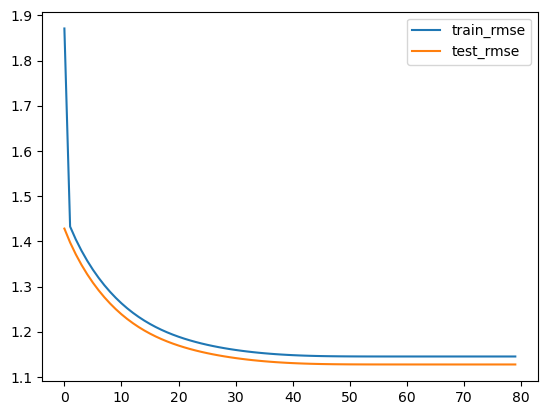

In [226]:
#display trainRMSE and testRMSE, define best stopping epoch M-ace
train_rmse=np.sqrt(history.history['loss'])
test_rmse=np.sqrt(history.history['val_loss'])
m_ace=np.argmin(test_rmse)
print(f'm_ace:{m_ace}')
plt.plot(train_rmse)
plt.plot(test_rmse)
plt.legend(['train_rmse','test_rmse'])

In [227]:
#evaluate auto encoder performance with relative error ratio.compare on both train and test set
z_n=np.concatenate((z_train,z_test),axis=0)
mean_norm=np.round((np.mean(np.linalg.norm(z_n,axis=1))),4) # norm of each vector in Zn , then compute mean of norms. 
print(f'mean_norm:{mean_norm}')
R_ace_test=np.round(test_rmse[m_ace]/mean_norm,4)
print(f'R_ace_test:{R_ace_test}')
R_ace_train=np.round(train_rmse[m_ace]/mean_norm,4)
print(f'R_ace_train:{R_ace_train}')
# R_ace_test is 0.0436 which is much less than 1. R_ace_train is a little bit lower but still very close to R_ace_test. 
# to compare,use t_test.


mean_norm:26.46179962158203
R_ace_test:0.0426
R_ace_train:0.0433


### Q5: DEEP LEARNING: Create a new MLP with 2 hidden layers

In [506]:
# Define the truncated MLP_high as the short multilayer perceptron MLP1: L1->H
# Where the weights and thresholds are inherited from MLP_high

In [517]:
# Define the truncated AEC_star as the short multilayer perceptron MLP2: H->K
# Where the weights and thresholds are inherited from AEC_star

In [117]:
Xn=np.vstack((X_TRAIN,X_TEST))
Yn=np.vstack((y_TEST,y_TEST))
Xn.shape,Yn.shape

((10299, 561), (4126, 6))

In [161]:
# integer class true label dimension1
y_TRAIN_int= np.array(y_TRAIN_int)
y_TEST_int= np.array(y_TEST_int)
y_n = np.concatenate((y_TRAIN_int, y_TEST_int))
y_n = np.array(y_n)
y_n.shape
yn= np.reshape(y_n, (10299, 1))


In [164]:
# The concatenation of MLP1 and MLP2 is simply the MLP12: L1->H->K 
# where all the weights and thresholds are already defined by the preceding two truncations
MLP1 = tf.keras.Sequential()
MLP1.add(keras.Input(shape=(561,)))
MLP1.add(layers.Dense(345, activation="relu"))

sparsity_target = 0.1
input_layer2 = keras.Input(shape=(345,))
encoded_layer2 = layers.Dense(345, activation='relu',
                activity_regularizer=keras.regularizers.l1(sparsity_target))(input_layer2)
MLP2 = keras.Model(input_layer2, encoded_layer2)

MLP12 = tf.keras.Sequential()
MLP12.add(MLP1)
MLP12.add(MLP2)

# Compile the model
MLP12.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

# Train the model
Un = MLP12(Xn,training=True)
Un.shape

TensorShape([10299, 345])

In [165]:
# Now consider each Un as a new  input vector describing case ”n”. 
# These new input vectors are going to be used to train 
Un = np.array(Un)
U = np.hstack((Un, yn))

U1 = U[U[:,-1]==1]
U2 = U[U[:,-1]==2]
U3 = U[U[:,-1]==3]
U4 = U[U[:,-1]==4]
U5 = U[U[:,-1]==5]
U6 = U[U[:,-1]==6]

UX1 = U1[:,:345] # Features
Uy1 = U1[:,-1] # Target variable
UX2 = U2[:,:345] # Features
Uy2 = U2[:,-1] # Target variable
UX3 = U3[:,:345] # Features
Uy3 = U3[:,-1] # Target variable
UX4 = U4[:,:345] # Features
Uy4 = U4[:,-1] # Target variable
UX5 = U5[:,:345] # Features
Uy5 = U5[:,-1] # Target variable
UX6 = U6[:,:345] # Features
Uy6 = U6[:,-1] # Target variable
# Split the dataset into training and test sets with stratified sampling
UX_train1, UX_test1, Uy_train1, Uy_test1 = train_test_split(UX1, Uy1, test_size=0.2, stratify=Uy1)
UX_train2, UX_test2, Uy_train2, Uy_test2 = train_test_split(UX2, Uy2, test_size=0.2, stratify=Uy2)
UX_train3, UX_test3, Uy_train3, Uy_test3 = train_test_split(UX3, Uy3, test_size=0.2, stratify=Uy3)
UX_train4, UX_test4, Uy_train4, Uy_test4 = train_test_split(UX4, Uy4, test_size=0.2, stratify=Uy4)
UX_train5, UX_test5, Uy_train5, Uy_test5 = train_test_split(UX5, Uy5, test_size=0.2, stratify=Uy5)
UX_train6, UX_test6, Uy_train6, Uy_test6 = train_test_split(UX6, Uy6, test_size=0.2, stratify=Uy6)
UX_TRAIN = np.vstack((UX_train1, UX_train2,UX_train3,UX_train4, UX_train6,UX_train6))
UX_TEST = np.vstack((UX_test1,UX_test2,UX_test3,UX_test4,UX_test5,UX_test6))
Uy_TRAIN = np.concatenate((Uy_train1, Uy_train2,Uy_train3,Uy_train4, Uy_train6,Uy_train6))
Uy_TEST = np.concatenate((Uy_test1,Uy_test2,Uy_test3,Uy_test4,Uy_test5,Uy_test6))

In [166]:
Uy_TRAIN_int=Uy_TRAIN.astype(int)
Uy_TRAIN = np.eye(6)[Uy_TRAIN_int-1]
Uy_TRAIN.shape # one-hot encoding of y_TRAIN

Uy_TEST_int=Uy_TEST.astype(int)
Uy_TEST = np.eye(6)[Uy_TEST_int-1]
Uy_TEST.shape # one-hot encoding of y_TEST

(2063, 6)

In [219]:
# Build a new MLP classifier MLP3 : K->G->OUT->softmax
# where G is a hidden layer of dimension dim(G)=g=h_high/2=172
# Try epochs = 150 
train_avCRE_3=list()
test_avCRE_3=list()
test_accuracy_3=list()
train_accuracy_3=list()

model_3 = tf.keras.Sequential() #build model
model_3.add(keras.Input(shape=(345,)))
model_3.add(layers.Dense(172, activation="relu"))
model_3.add(layers.Dense(6,activation="softmax"))
  
# Define the training options
optimizer = tf.keras.optimizers.Adam()
batch_size = Ntrain // 100
num_epochs = 150
    
model_3.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
loss_fn = tf.keras.losses.CategoricalCrossentropy()

train_dataset = tf.data.Dataset.from_tensor_slices((UX_TRAIN, Uy_TRAIN)) # for batch train , create dataset
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((UX_TEST, Uy_TEST)).batch(batch_size)

for epoch in range(num_epochs):
    start = time.time()
    with tf.GradientTape() as tape:
        for step, (Xbatch_train, Ybatch_train) in enumerate(train_dataset): 
            with tf.GradientTape() as tape:

                prediction_train_batch = model_3(Xbatch_train,training=True)
                prediction_train.append(prediction_train_batch)
                loss_train = loss_fn(Ybatch_train, prediction_train_batch)
                
                grads = tape.gradient(loss_train, model_3.trainable_weights)
                model_3.optimizer.apply_gradients(zip(grads, model_3.trainable_weights)) 
        
    train_loss_3, train_acc_3 = model_3.evaluate(UX_TRAIN, Uy_TRAIN, verbose=0)
    test_loss_3, test_acc_3 = model_3.evaluate(UX_TEST, Uy_TEST, verbose=0)
    train_avCRE_3.append(train_loss_3)
    test_avCRE_3.append(test_loss_3)
    test_accuracy_3.append(test_acc_3)
    train_accuracy_3.append(train_acc_3)
    end=time.time()
    cpu_3=end-start


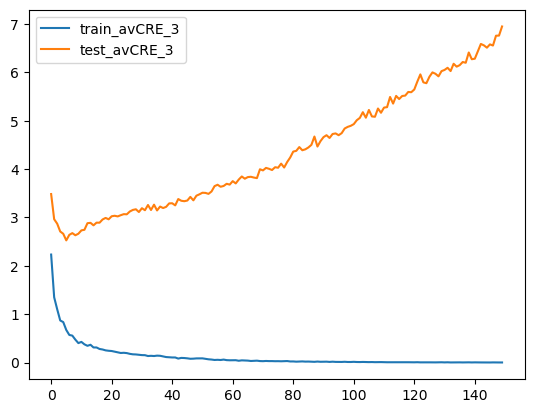

In [257]:
# Display train.avCRE(m) and test.avCRE(m) versus epoch(m)curves on same graph
plt.plot(range(150),train_avCRE_3)
plt.plot(range(150),test_avCRE_3)
plt.legend(['train_avCRE_3','test_avCRE_3'])
# epochs = 150 was sufficient, the training CRE are stable

In [258]:
m_CRE_test_3=np.argmin(test_avCRE_3)
m_CRE_train_3=np.argmin(train_avCRE_3)
m_CRE_train_3,m_CRE_test_3

(145, 5)

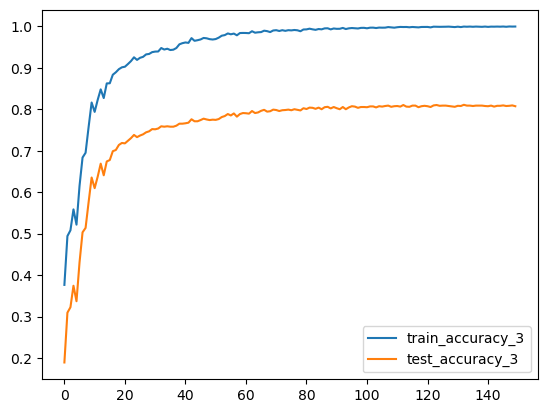

In [259]:
plt.plot(range(150),train_accuracy_3)
plt.plot(range(150),test_accuracy_3)
plt.legend(['train_accuracy_3','test_accuracy_3'])

In [255]:
m_acc_train_3=np.argmax(train_accuracy_3)
m_acc_test_3=np.argmax(test_accuracy_3)
m_acc_train_3,m_acc_test_3

(147, 132)

In [218]:
# Select the best stop epochs for MLP3 is 40
train_avCRE_MLP3=list()
test_avCRE_MLP3=list()
test_accuracy_MLP3=list()

MLP3 = tf.keras.Sequential() #build model
MLP3.add(keras.Input(shape=(345,)))
MLP3.add(layers.Dense(172, activation="relu"))
MLP3.add(layers.Dense(6,activation="softmax"))
  
# Define the training options
optimizer = tf.keras.optimizers.Adam()
batch_size = Ntrain // 100
num_epochs = 60
    
MLP3.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
loss_fn = tf.keras.losses.CategoricalCrossentropy()

train_dataset = tf.data.Dataset.from_tensor_slices((UX_TRAIN, Uy_TRAIN)) # for batch train , create dataset
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((UX_TEST, Uy_TEST)).batch(batch_size)

for epoch in range(num_epochs):
    start = time.time()
    with tf.GradientTape() as tape:
        for step, (Xbatch_train, Ybatch_train) in enumerate(train_dataset): 
            with tf.GradientTape() as tape:

                prediction_train_batch = MLP3(Xbatch_train,training=True)
                prediction_train.append(prediction_train_batch)
                loss_train = loss_fn(Ybatch_train, prediction_train_batch)
                
                grads = tape.gradient(loss_train, MLP3.trainable_weights)
                MLP3.optimizer.apply_gradients(zip(grads, MLP3.trainable_weights)) 
        
    train_loss_MLP3, train_acc_MLP3 = MLP3.evaluate(UX_TRAIN, Uy_TRAIN, verbose=0)
    test_loss_MLP3, test_acc_MLP3 = MLP3.evaluate(UX_TEST, Uy_TEST, verbose=0)
    train_avCRE_MLP3.append(train_loss_MLP3)
    test_avCRE_MLP3.append(test_loss_MLP3)
    test_accuracy_MLP3.append(test_acc_MLP3)
    end=time.time()
    cpu_MLP3=end-start

In [217]:
# Compute the test accuracy and the test set confusion matrix for MLP3*.
test_acc_MLP3 = np.round(test_accuracy_MLP3[-1]*100,2)
print('test_accuracy of MLP3 is ',test_acc_MLP3,'%')

test_accuracy of MLP3 is  77.99 %


In [212]:
# Compute the k x k(6*6) confusion matrix testCONF_MLP3 of MLP3 on the test set 
y_predict_MLP3 = np.argmax(model_3.predict(UX_TEST),axis=1)
y_pred_MLP3 = y_predict_MLP3+1

from sklearn.metrics import confusion_matrix
testCONF_MLP3 = confusion_matrix(Uy_TEST_int, y_pred_MLP3)

R1 = np.round(testCONF_MLP3[0,:] / np.sum(testCONF_MLP3[0,:]), 4) * 100
R2 = np.round(testCONF_MLP3[1,:] / np.sum(testCONF_MLP3[1,:]), 4) * 100
R3 = np.round(testCONF_MLP3[2,:] / np.sum(testCONF_MLP3[2,:]), 4) * 100
R4 = np.round(testCONF_MLP3[3,:] / np.sum(testCONF_MLP3[3,:]), 4) * 100
R5 = np.round(testCONF_MLP3[4,:] / np.sum(testCONF_MLP3[4,:]), 4) * 100
R6 = np.round(testCONF_MLP3[5,:] / np.sum(testCONF_MLP3[5,:]), 4) * 100
conf_matrix_test_MLP3 = np.vstack((R1, R2, R3, R4, R5, R6))
print(conf_matrix_test_MLP3)

65/65 [==============================] - 0s 587us/step
[[ 70.14   8.7   21.16   0.     0.     0.  ]
 [  0.    70.87  29.13   0.     0.     0.  ]
 [  0.35   2.48  97.16   0.     0.     0.  ]
 [  0.     0.     0.    96.07   0.     3.93]
 [  0.     0.     0.   100.     0.     0.  ]
 [  0.     0.     0.     0.     0.   100.  ]]


In [222]:
# The concatenation of MLP12 and MLP3* determines a long MLP classifier with 3 hidden 
# layers H,K,G, L1->H->K->G->OUT->softmax
MLP_long = tf.keras.Sequential()
MLP_long.add(MLP12)
MLP_long.add(MLP3)

In [214]:
# This MLPlong has the same test accuracy and test set confusion matrix as MLP3*
MLP_long.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
test_loss_long, test_acc_long = MLP_long.evaluate(X_TEST, y_TEST, verbose=0)   
acc_long = np.round(test_acc_long*100,2)
print('test_accuracy of MLP_long is ',acc_long,'%')

test_accuracy of MLP_long is  76.01 %


In [223]:
# Compute the k x k(6*6) confusion matrix testCONF_long of MLP_long on the test set 
y_predict_long = np.argmax(MLP_long.predict(X_TEST),axis=1)
y_pred_long = y_predict_long+1

from sklearn.metrics import confusion_matrix
testCONF_long = confusion_matrix(y_TEST_int, y_pred_long)

R1 = np.round(testCONF_long[0,:] / np.sum(testCONF_long[0,:]), 4) * 100
R2 = np.round(testCONF_long[1,:] / np.sum(testCONF_long[1,:]), 4) * 100
R3 = np.round(testCONF_long[2,:] / np.sum(testCONF_long[2,:]), 4) * 100
R4 = np.round(testCONF_long[3,:] / np.sum(testCONF_long[3,:]), 4) * 100
R5 = np.round(testCONF_long[4,:] / np.sum(testCONF_long[4,:]), 4) * 100
R6 = np.round(testCONF_long[5,:] / np.sum(testCONF_long[5,:]), 4) * 100
conf_matrix_test_long = np.vstack((R1, R2, R3, R4, R5, R6))
print(conf_matrix_test_long)

65/65 [==============================] - 0s 1ms/step
[[ 93.91   2.9    3.19   0.     0.     0.  ]
 [  0.65  95.47   3.88   0.     0.     0.  ]
 [  0.71   0.71  98.58   0.     0.     0.  ]
 [  0.     0.     0.    99.72   0.     0.28]
 [  0.     0.     0.   100.     0.     0.  ]
 [  0.     0.     0.     0.     0.   100.  ]]


In [198]:
# Compare these characteristics of classification quality to the results of previous 
# questions to decide which MLP architecture yielded the best classifier. 
# The best one is MLP_high.